# Exploratory Data Analysis (EDA) - Taxis NYC & Carbon Emissions -Informe Final

## By DataVision

### DEMANDA DE LOS VIAJES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cargar los archivos
df_hourly_demand = pd.read_parquet('taxis_hourlydemand.parquet')
df_borough_demand = pd.read_parquet('taxis_boroughdemand.parquet')
df_borough_demand = df_borough_demand.reset_index()

In [5]:
# Asegurarse de que las columnas de fecha están en el formato adecuado
df_hourly_demand['date'] = pd.to_datetime(df_hourly_demand['date'])
df_borough_demand['date'] = pd.to_datetime(df_borough_demand['date'])

In [6]:
# Visualizar las primeras filas de cada DataFrame
df_hourly_demand.head(), df_borough_demand.head()

(        date  hour  demand
 0 2021-01-01     0    1238
 1 2021-01-01     1    1388
 2 2021-01-01     2     971
 3 2021-01-01     3     513
 4 2021-01-01     4     270,
 Borough       date  Bronx  Brooklyn  Manhattan  Queens  Staten Island
 0       2021-01-01   2.03      3.51      84.67    9.75           0.03
 1       2021-01-02   1.59      3.04      84.98   10.38           0.02
 2       2021-01-03   1.67      3.19      80.13   14.97           0.04
 3       2021-01-04   2.09      4.00      84.73    9.13           0.04
 4       2021-01-05   2.01      3.98      86.69    7.28           0.04)

In [7]:
# Dimensiones de los DataFrames
print("Dimensiones del DataFrame de demanda horaria:", df_hourly_demand.shape)
print("Dimensiones del DataFrame de demanda por boroughs:", df_borough_demand.shape)

Dimensiones del DataFrame de demanda horaria: (26277, 3)
Dimensiones del DataFrame de demanda por boroughs: (1095, 6)


In [8]:
# Columnas disponibles en cada DataFrame
print("Columnas en df_hourly_demand:", df_hourly_demand.columns)
print("Columnas en df_borough_demand:", df_borough_demand.columns)

Columnas en df_hourly_demand: Index(['date', 'hour', 'demand'], dtype='object')
Columnas en df_borough_demand: Index(['date', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='Borough')


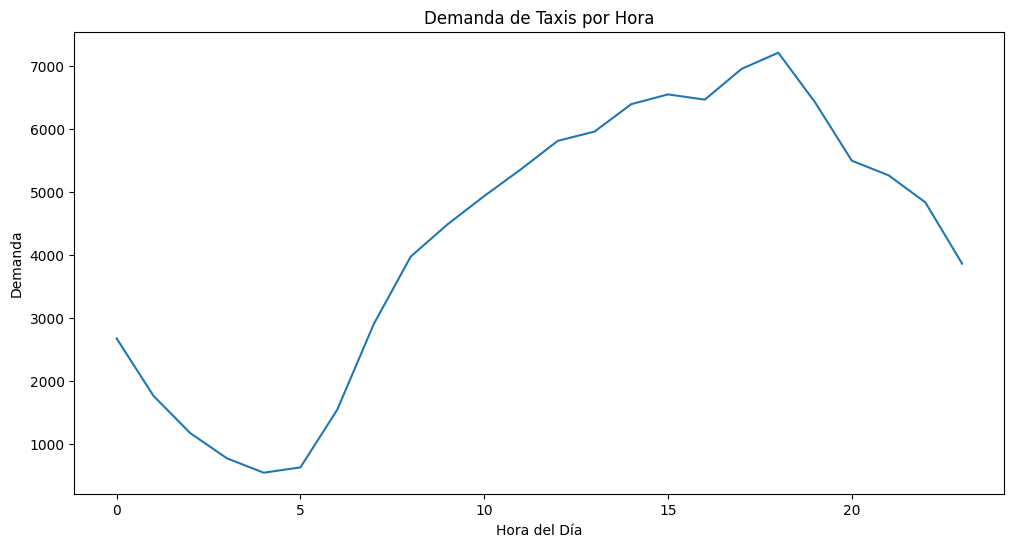

In [10]:
# Gráfico de demanda por hora

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='demand', data=df_hourly_demand, errorbar=None)
plt.title('Demanda de Taxis por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Demanda')
plt.show()

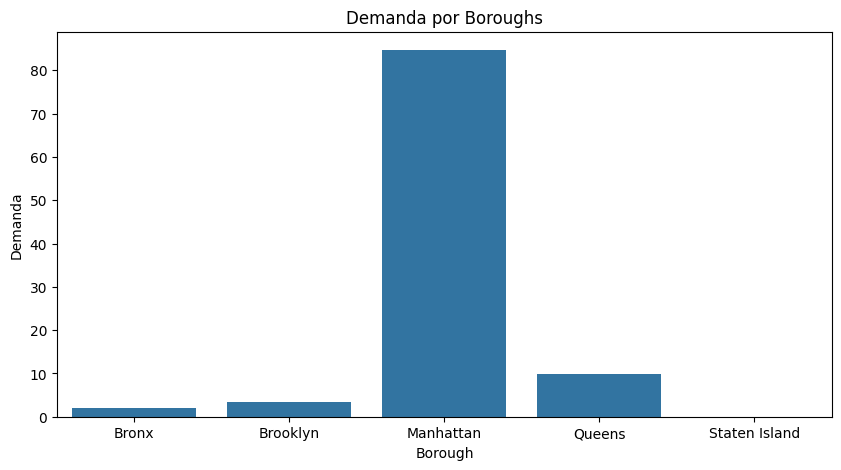

In [12]:
# Visualización de la demanda por boroughs en un día específico

# Seleccionar una fecha específica
fecha_especifica = '2021-01-01'
df_filtered = df_borough_demand[df_borough_demand['date'] == fecha_especifica]

# Visualización de la demanda por boroughs
plt.figure(figsize=(10, 5))
sns.barplot(x=df_filtered.columns[1:], y=df_filtered.iloc[0, 1:].values)
plt.title(f'Demanda por Boroughs')
plt.xlabel('Borough')
plt.ylabel('Demanda')
plt.show()

### CLIMA

In [13]:
# Cargar el dataset
df_clima = pd.read_parquet('weather_daily.parquet')

In [14]:
# Información básica del dataset
df_clima.info()

# Descripción estadística del dataset
df_clima.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1826 non-null   object 
 1   weather_code         1826 non-null   float32
 2   temperature_2m_max   1826 non-null   float32
 3   temperature_2m_min   1826 non-null   float32
 4   rain_sum             1826 non-null   float32
 5   snowfall_sum         1826 non-null   float32
 6   precipitation_hours  1826 non-null   float32
 7   wind_speed_10m_max   1826 non-null   float32
dtypes: float32(7), object(1)
memory usage: 64.3+ KB


,weather_code,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,32.123768,16.937477,8.299143,3.599069,0.127503,3.892662,21.745956
std,28.825825,9.570116,9.120131,9.209105,1.022870,5.465356,7.240386
min,0.000000,-11.327500,-17.477501,0.000000,0.000000,0.000000,6.638072
25%,2.000000,8.935000,0.622500,0.000000,0.000000,0.000000,16.781561
50%,51.000000,17.197499,7.947500,0.100000,0.000000,1.000000,20.633371
75%,61.000000,25.259999,16.359999,2.700000,0.000000,6.000000,25.528285
max,75.000000,37.322498,26.072498,187.199982,27.020002,24.000000,60.356659


In [15]:
# Verificar valores faltantes
missing_values = df_clima.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

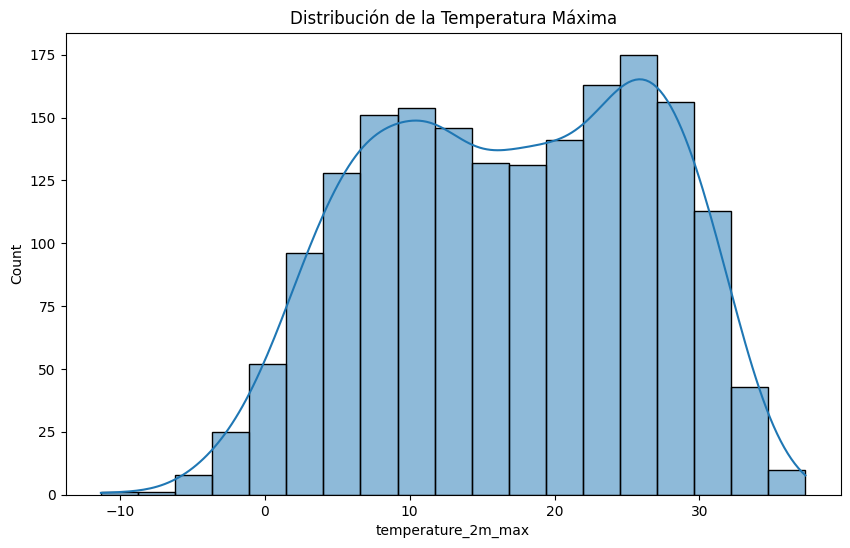

In [16]:
# Histograma de la temperatura máxima
plt.figure(figsize=(10, 6))
sns.histplot(df_clima['temperature_2m_max'], kde=True)
plt.title('Distribución de la Temperatura Máxima')
plt.show()

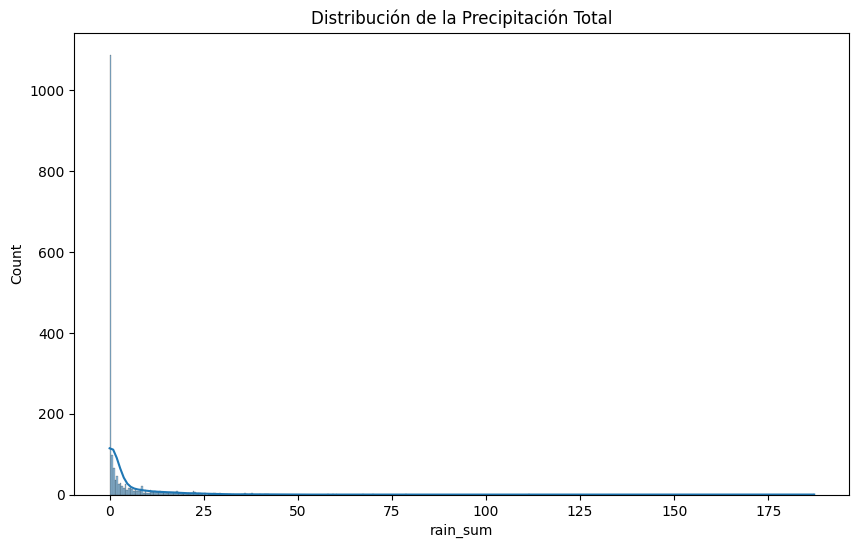

In [18]:
# Histograma de la precipitación total
plt.figure(figsize=(10, 6))
sns.histplot(df_clima['rain_sum'], kde=True)
plt.title('Distribución de la Precipitación Total')
plt.show()

In [19]:
# Convertir la columna de fecha a tipo datetime si es necesario
df_clima['date'] = pd.to_datetime(df_clima['date'])

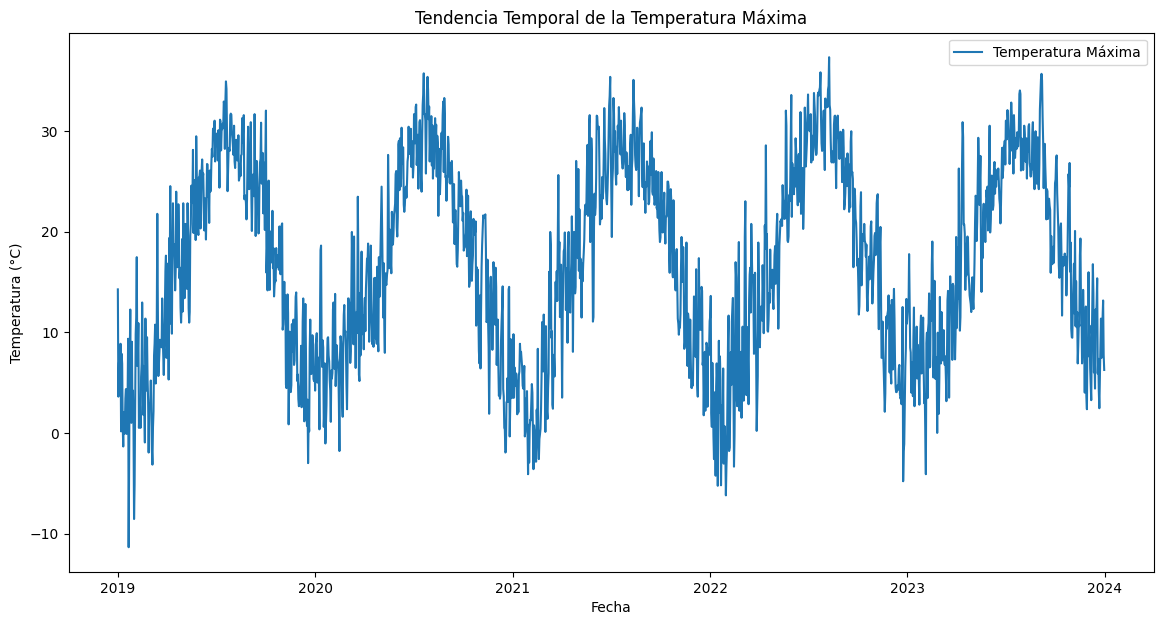

In [20]:
# Análisis temporal de la temperatura máxima
plt.figure(figsize=(14, 7))
plt.plot(df_clima['date'], df_clima['temperature_2m_max'], label='Temperatura Máxima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.title('Tendencia Temporal de la Temperatura Máxima')
plt.legend()
plt.show()

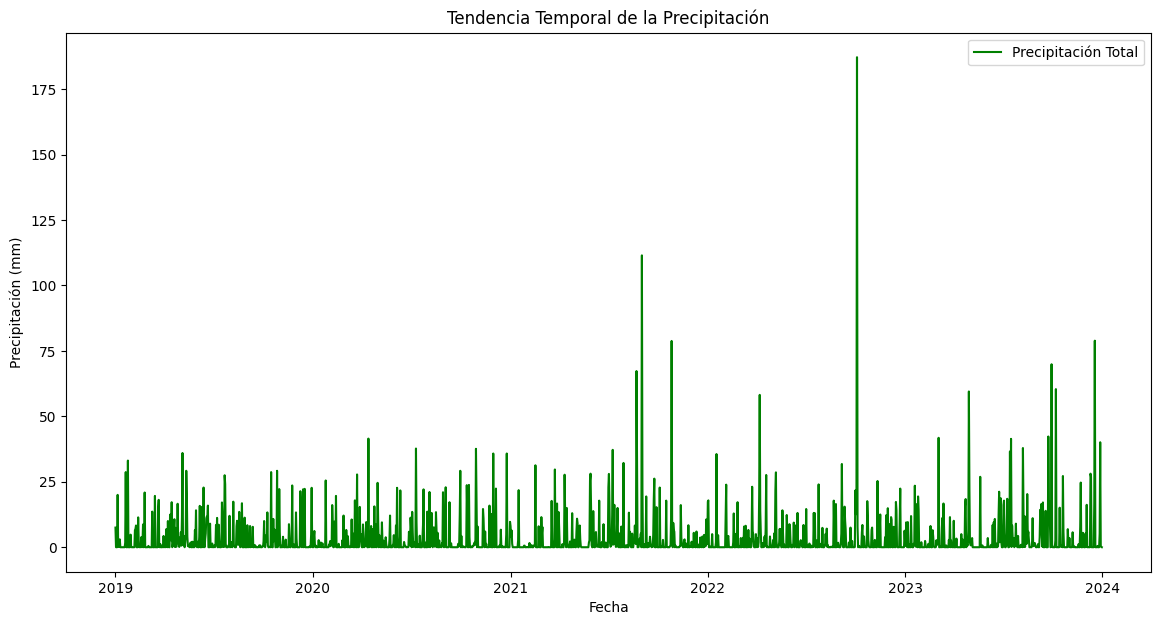

In [21]:
# Análisis temporal de la precipitación total
plt.figure(figsize=(14, 7))
plt.plot(df_clima['date'], df_clima['rain_sum'], label='Precipitación Total', color='g')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.title('Tendencia Temporal de la Precipitación')
plt.legend()
plt.show()

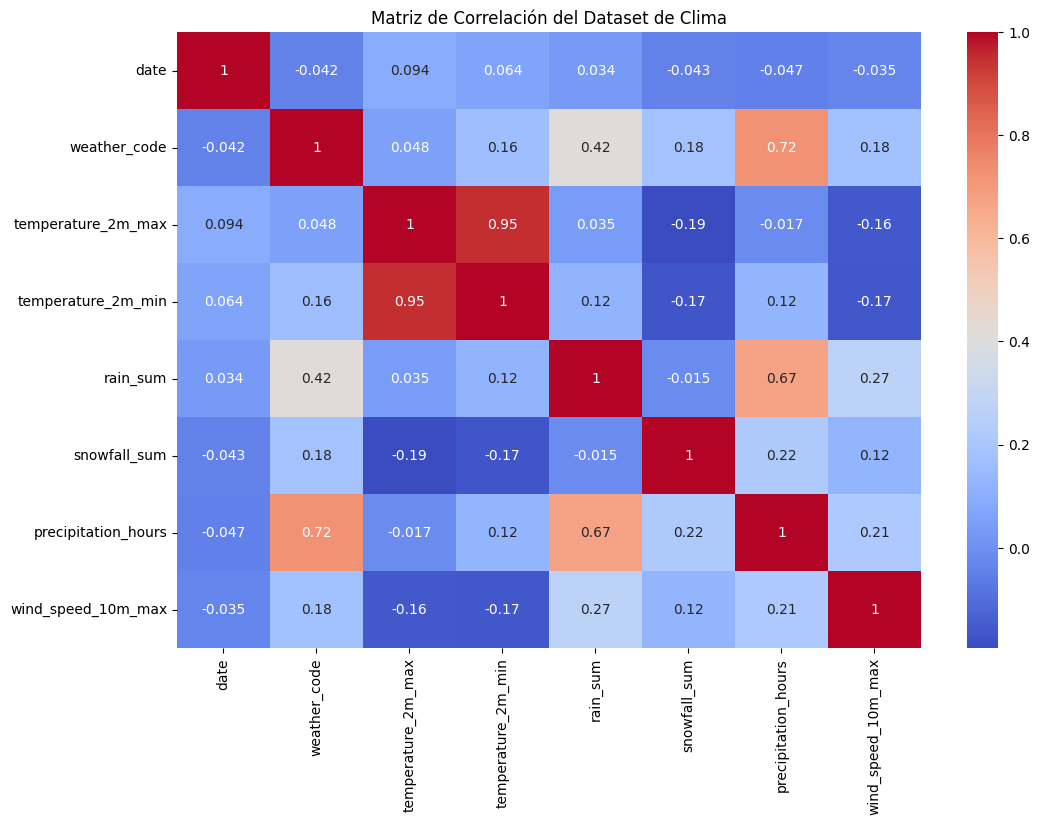

In [22]:
# Matriz de correlaciones
correlation_matrix = df_clima.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación del Dataset de Clima')
plt.show()

### VIAJES VS. CLIMA

In [23]:
# Cargar los datasets
df_taxis = pd.read_parquet('taxis_dailydemand.parquet')
df_clima = pd.read_parquet('weather_daily.parquet')

In [24]:
# Asegúrate de que ambas columnas 'date' estén en el formato datetime
df_taxis['date'] = pd.to_datetime(df_taxis['date'])
df_clima['date'] = pd.to_datetime(df_clima['date'])

In [25]:
# Combinar datasets basados en la fecha y hora
df = pd.merge(df_taxis, df_clima, on='date')
print(df.head())

        date  demand  season_number season_name  weather_code  \
0 2021-01-01   25858              1      Winter          63.0   
1 2021-01-02   36213              1      Winter          61.0   
2 2021-01-03   27665              1      Winter          71.0   
3 2021-01-04   47453              1      Winter          71.0   
4 2021-01-05   49882              1      Winter           3.0   

   temperature_2m_max  temperature_2m_min  rain_sum  snowfall_sum  \
0              3.5225             -2.6275  8.099999          0.00   
1              9.8225              1.3225  4.100000          0.00   
2              3.5225             -1.2775  6.400000          0.07   
3              6.5225              0.5725  1.300000          0.14   
4              4.8725              0.8225  0.000000          0.00   

   precipitation_hours  wind_speed_10m_max  
0                  6.0           17.106628  
1                  7.0           31.178993  
2                 13.0           24.522314  
3             

In [26]:
# Resumen estadístico de las columnas numéricas
df.describe()

,date,demand,season_number,weather_code,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max
count,1095,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2022-07-02 00:00:00,101883.817352,2.504110,31.483105,17.170399,8.298801,3.763379,0.125553,3.713242,21.727665
min,2021-01-01 00:00:00,5991.000000,1.000000,0.000000,-6.177500,-17.477501,0.000000,0.000000,0.000000,6.877789
25%,2021-10-01 12:00:00,90123.500000,2.000000,2.000000,9.497500,0.797500,0.000000,0.000000,0.000000,16.781561
50%,2022-07-02 00:00:00,105213.000000,3.000000,51.000000,17.472500,8.022500,0.000000,0.000000,1.000000,20.683559
75%,2023-04-01 12:00:00,119938.000000,3.000000,61.000000,25.622499,16.272499,2.600000,0.000000,6.000000,25.477470
max,2023-12-31 00:00:00,147623.000000,4.000000,75.000000,37.322498,26.072498,187.199982,27.020002,24.000000,54.010796
std,NaN,23741.162155,1.109923,29.002640,9.600096,9.067804,10.549718,1.078341,5.358616,7.045223


In [27]:
# Revisión de valores nulos
null_values = df.isnull().sum()

# Visualización de la proporción de valores nulos
null_values_percentage = (null_values / len(df)) * 100

# Mostrando el resultado
pd.DataFrame({'Valores Nulos': null_values, 'Porcentaje (%)': null_values_percentage})


,Valores Nulos,Porcentaje (%)
date,0,0.0
demand,0,0.0
season_number,0,0.0
season_name,0,0.0
weather_code,0,0.0
temperature_2m_max,0,0.0
temperature_2m_min,0,0.0
rain_sum,0,0.0
snowfall_sum,0,0.0
precipitation_hours,0,0.0


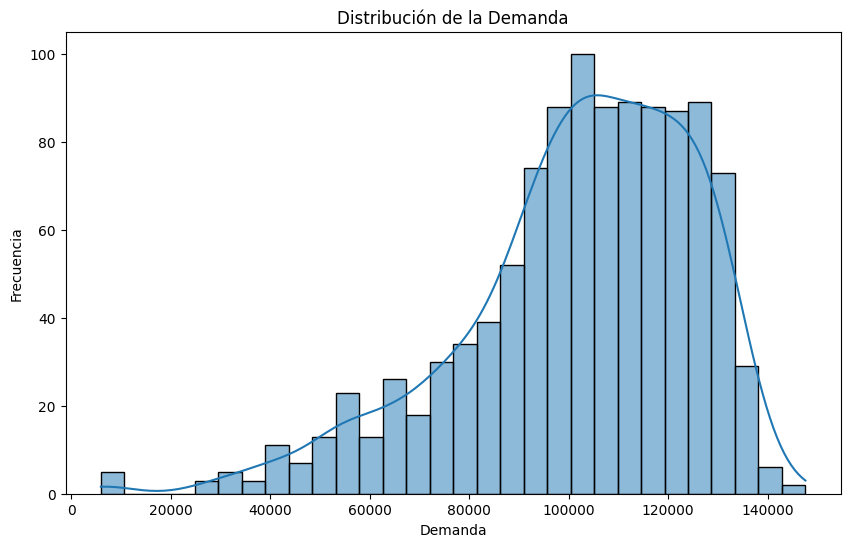

In [28]:
# Histograma para la distribución de la demanda
plt.figure(figsize=(10, 6))
sns.histplot(df['demand'], bins=30, kde=True)
plt.title('Distribución de la Demanda')
plt.xlabel('Demanda')
plt.ylabel('Frecuencia')
plt.show()

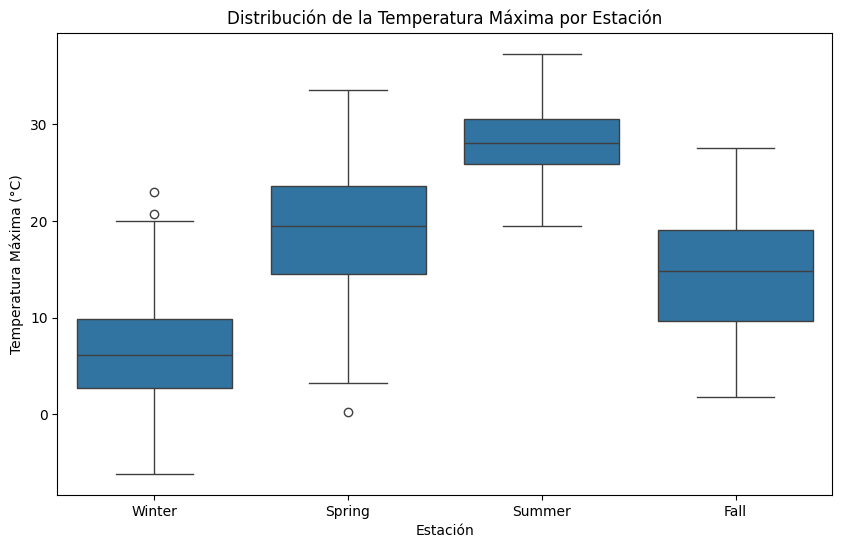

In [29]:
# Boxplot para las temperaturas
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_name', y='temperature_2m_max', data=df)
plt.title('Distribución de la Temperatura Máxima por Estación')
plt.xlabel('Estación')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()

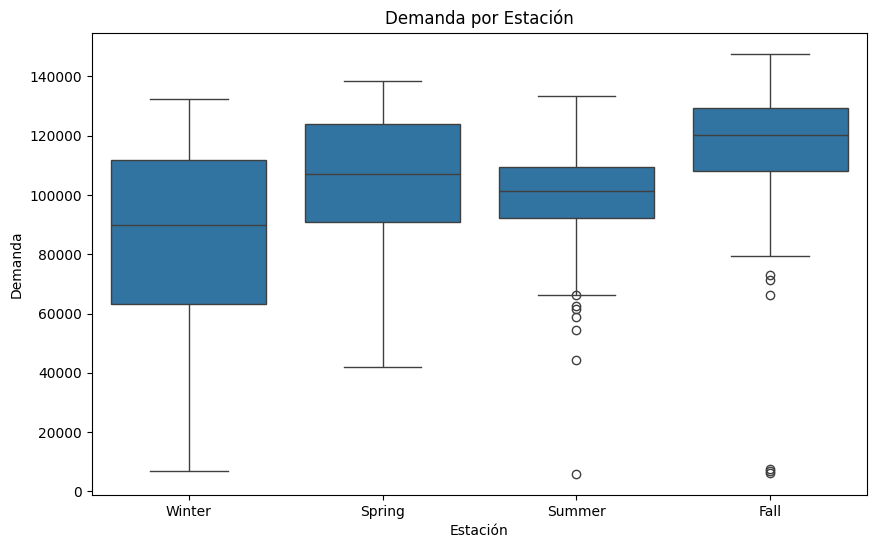

In [34]:
# Boxplot de la demanda por estación
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_name', y='demand', data=df)
plt.title('Demanda por Estación')
plt.xlabel('Estación')
plt.ylabel('Demanda')
plt.show()

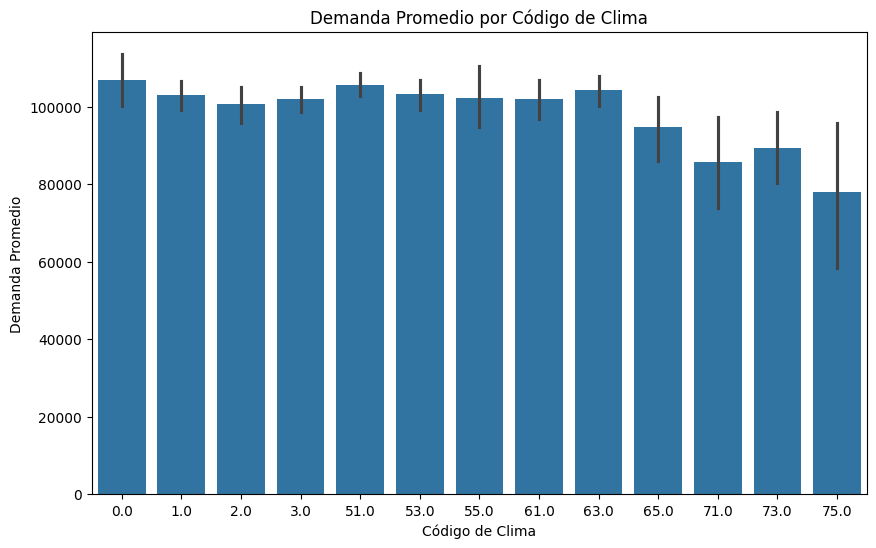

In [35]:
# Demanda promedio por código de clima
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_code', y='demand', data=df)
plt.title('Demanda Promedio por Código de Clima')
plt.xlabel('Código de Clima')
plt.ylabel('Demanda Promedio')
plt.show()

## Conclusiones

A través de este análisis exploratorio, hemos podido visualizar patrones y tendencias clave en la demanda de taxis en la ciudad de Nueva York y su relación con el clima. Esto incluye la variabilidad de la demanda a lo largo del día, las diferencias en la demanda entre los distintos boroughs y por las diferentes condiciones climáticas de la ciudad. Estos insights pueden servir como base para futuros análisis predictivos y optimización del servicio de taxis en la ciudad.